# _EVALUATION_

#### Carregamento das bibliotecas e funções

In [40]:
import numpy as np
import os
import joblib
from log_loss_tool import plot_log_loss_with_custom_input
from sklearn.metrics import  auc, precision_recall_curve
from src.models.evaluate_model import log_loss_final, calcular_variacao_relativa, calcular_prejuizo
from src.visualizations.plot_results import curva_de_aprendizado, monitorar_custo_gradiente, comparar_gradientes, plot_roc_curve, plot_precision_recall_curve, plot_probability_distribution, exibir_metricas_e_matriz_confusao, matriz_confusao
from sklearn.metrics import auc


## Regressão Logística - LogisticRegression

##### Carregando modelos treinados

In [41]:
# Obter o caminho absoluto da pasta src/models/train_saved
project_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
src_path = os.path.join(project_path, 'src/models/train_saved')

optimal_threshold_lr = joblib.load(os.path.join(src_path, 'optimal_threshold_lr.pkl'))
model_lr = joblib.load(os.path.join(src_path, 'model_lr.pkl'))
# Carregar o modelo treinado

##### Carregando variáveis processadas

In [42]:
# Obter o caminho absoluto da pasta src/data/processed_data
project_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
src_path = os.path.join(project_path, 'src/data/processed_data')

# Carregar as variáveis de volta
X_train = joblib.load(os.path.join(src_path, 'X_train.pkl'))
X_test = joblib.load(os.path.join(src_path, 'X_test.pkl'))
y_train = joblib.load(os.path.join(src_path, 'y_train.pkl'))
y_test = joblib.load(os.path.join(src_path, 'y_test.pkl'))
y_pred_lr = joblib.load(os.path.join(src_path, 'y_pred_lr.pkl'))
y_pred_th_otimo_lr = joblib.load(os.path.join(src_path, 'y_pred_th_otimo_lr.pkl'))
y_prob_th_lr = joblib.load(os.path.join(src_path, 'y_prob_th_lr.pkl'))

print("Dados carregados com sucesso!")

Dados carregados com sucesso!



##### Métricas e Matriz confusão

##### Documentação:  
[scikit-learn - classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)  
[scikit-learn - confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[scikit-learn - ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)


Métricas do modelo:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80      3626
           1       0.85      0.67      0.75      3601

    accuracy                           0.78      7227
   macro avg       0.79      0.78      0.78      7227
weighted avg       0.79      0.78      0.78      7227


Matriz de confusão salva


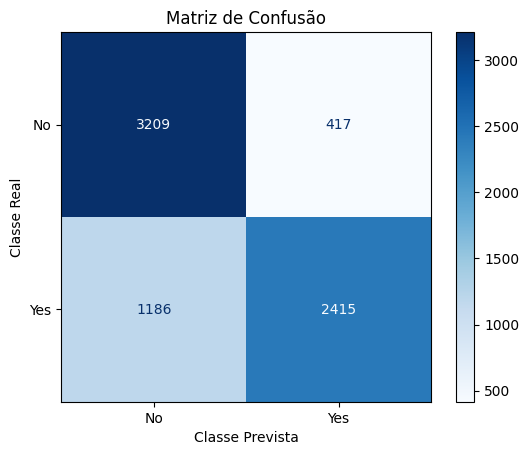

In [43]:
exibir_metricas_e_matriz_confusao(y_test, y_pred_lr, nome_arquivo='Matriz Confusão LogisticRegression - Threshold Padrão')

Visão de negócio

In [44]:
calcular_prejuizo(y_test, y_pred_lr, custo_fp=5, custo_fn=25)

Falsos Positivos (FP): 417 | Custo Unitário: R$ 5
Falsos Negativos (FN): 1186 | Custo Unitário: R$ 25
Prejuízo Total: R$ 31735.00


np.int64(31735)


##### Métricas e Matriz confusão - Threshold Ótimo


##### Documentação:  
[scikit-learn - classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)  
[scikit-learn - confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[scikit-learn - ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)


Métricas do modelo:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55      3626
           1       0.60      0.88      0.71      3601

    accuracy                           0.65      7227
   macro avg       0.69      0.65      0.63      7227
weighted avg       0.69      0.65      0.63      7227


Matriz de confusão salva


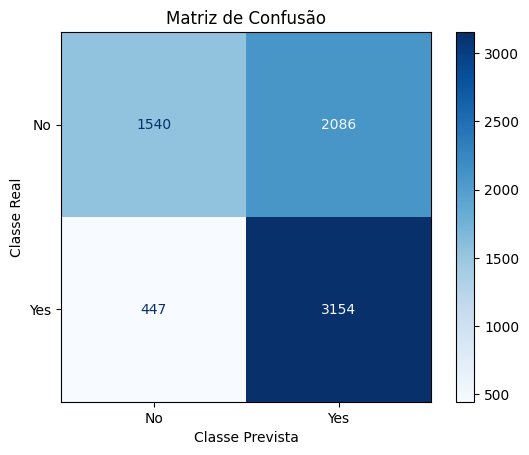

In [45]:
exibir_metricas_e_matriz_confusao(y_test, y_pred_th_otimo_lr, nome_arquivo='Matriz Confusão LogisticRegression - Threshold Ótimo Recall')

In [46]:
calcular_prejuizo(y_test, y_pred_th_otimo_lr, custo_fp=5, custo_fn=25)

Falsos Positivos (FP): 2086 | Custo Unitário: R$ 5
Falsos Negativos (FN): 447 | Custo Unitário: R$ 25
Prejuízo Total: R$ 21605.00


np.int64(21605)

### CURVA DE APRENDIZADO DO MODELO

##### Documentação:
[scikit-learn - learning_curve ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)


Gráfico salvo em


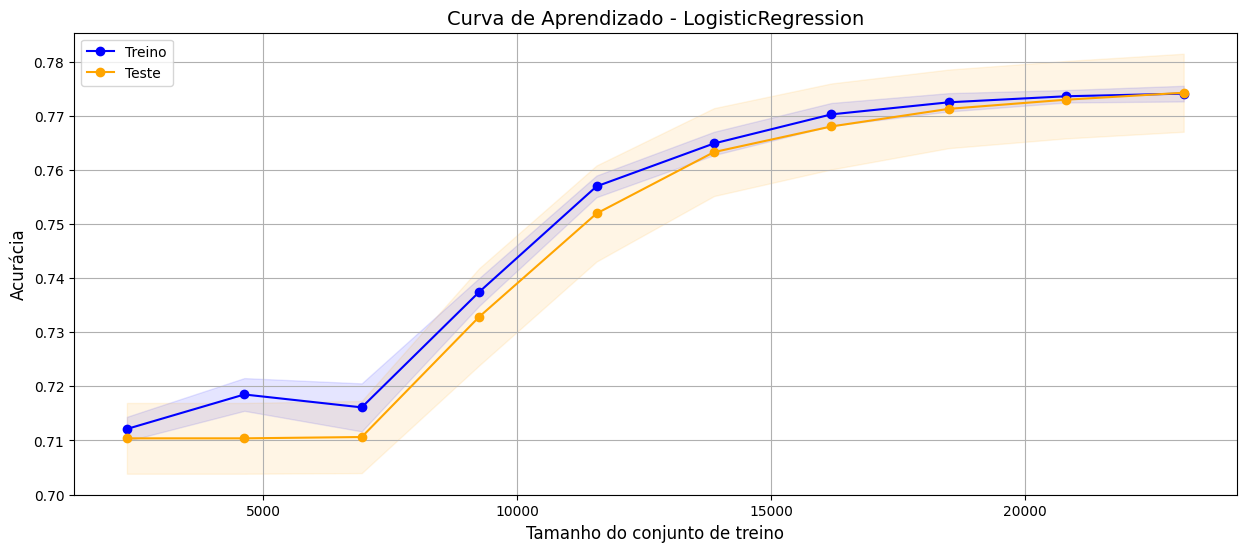

In [47]:
test_std, test_mean, test_scores = curva_de_aprendizado(model_lr, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), nome_arquivo='Curva de Aprendizado do modelo LogisticRegression')

Coeficiente de variação

In [48]:
cv = (test_std / test_mean) * 100
print("Coeficiente de Variação (%):")
print(cv)

if all(cv < 10):
    print("O modelo está estável com CV abaixo de 10%.")
else:
    print("O modelo apresenta variação alta.")

Coeficiente de Variação (%):
[0.920354   0.920354   0.93824014 1.22489517 1.18048273 1.06415022
 1.03417998 0.94172027 0.92549668 0.93138152]
O modelo está estável com CV abaixo de 10%.


Variação Relativa

In [49]:
calcular_variacao_relativa(test_scores, threshold=optimal_threshold_lr)

Variação relativa (desvio padrão / média) por tamanho de treino:
Tamanho 1: 0.0092
Tamanho 2: 0.0092
Tamanho 3: 0.0094
Tamanho 4: 0.0122
Tamanho 5: 0.0118
Tamanho 6: 0.0106
Tamanho 7: 0.0103
Tamanho 8: 0.0094
Tamanho 9: 0.0093
Tamanho 10: 0.0093

A variação está dentro dos limites aceitáveis (< 28.57142857142857%).


##### Função de custo - Log-loss

In [50]:
log_loss_geral, gradient_norm = log_loss_final(model_lr, X_train, y_train, X_test, y_test, optimal_threshold_lr)

Log Loss - Treino (Geral): 0.5013
Log Loss - Teste (Geral): 0.4981
Log Loss - Geral (Ponderada): 0.5007
Log Loss de Perda (classe 0) com threshold ótimo: 0.4670
Log Loss de Ganho (classe 1) com threshold ótimo: 0.5294
Norma do Gradiente: 6.8325


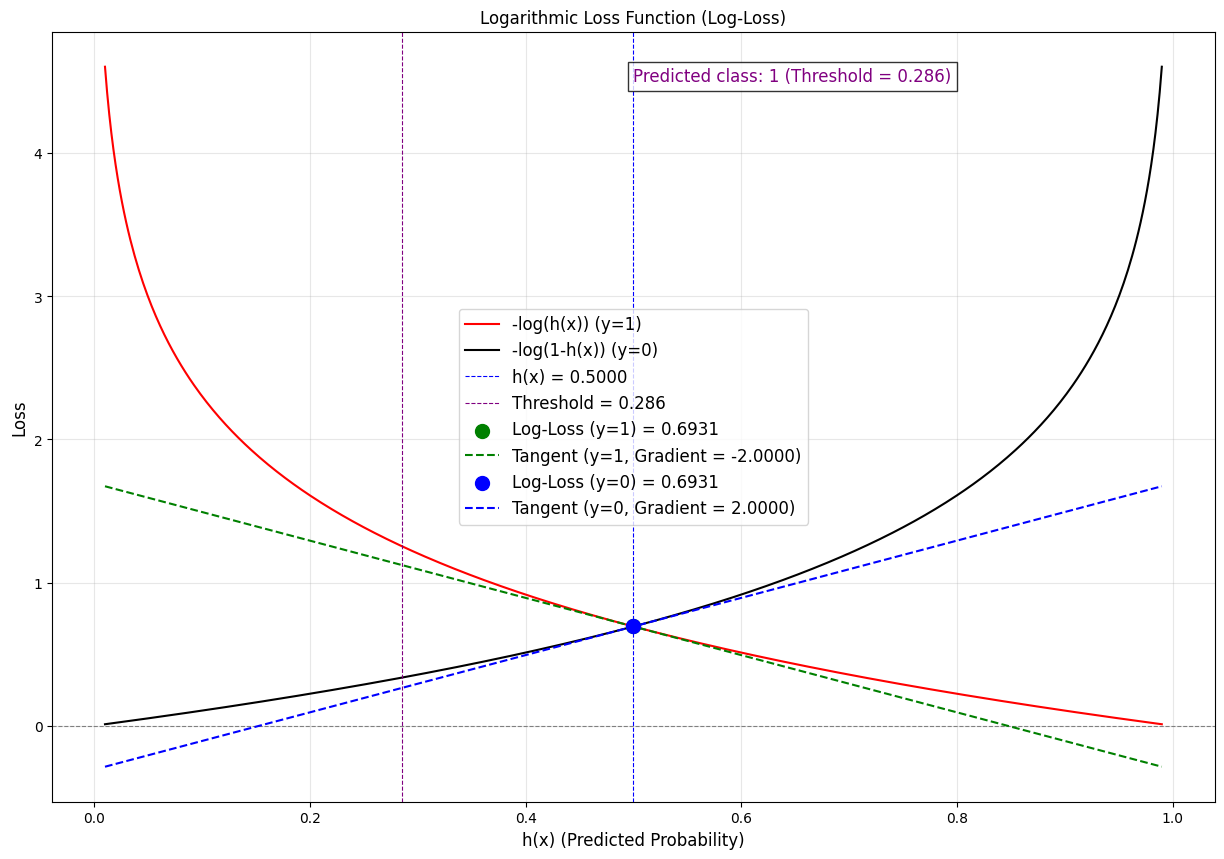

In [51]:
plot_log_loss_with_custom_input(
    probability=0.5,
    log_loss=log_loss_geral,
    threshold=optimal_threshold_lr
    
)

Gráfico de Custo salvo


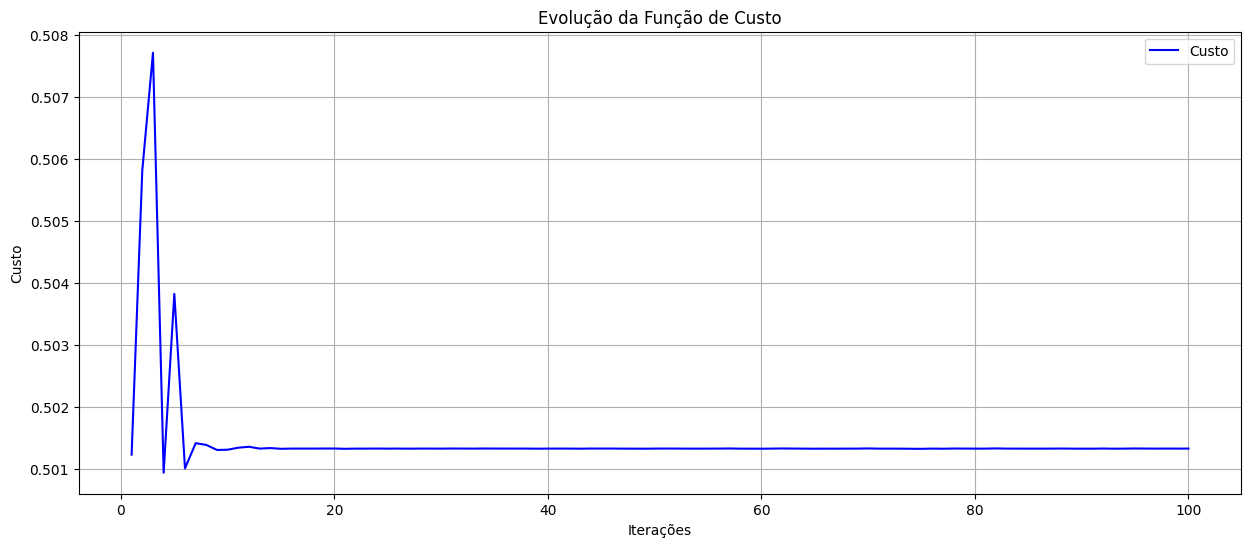

Gráfico de Gradiente salvo


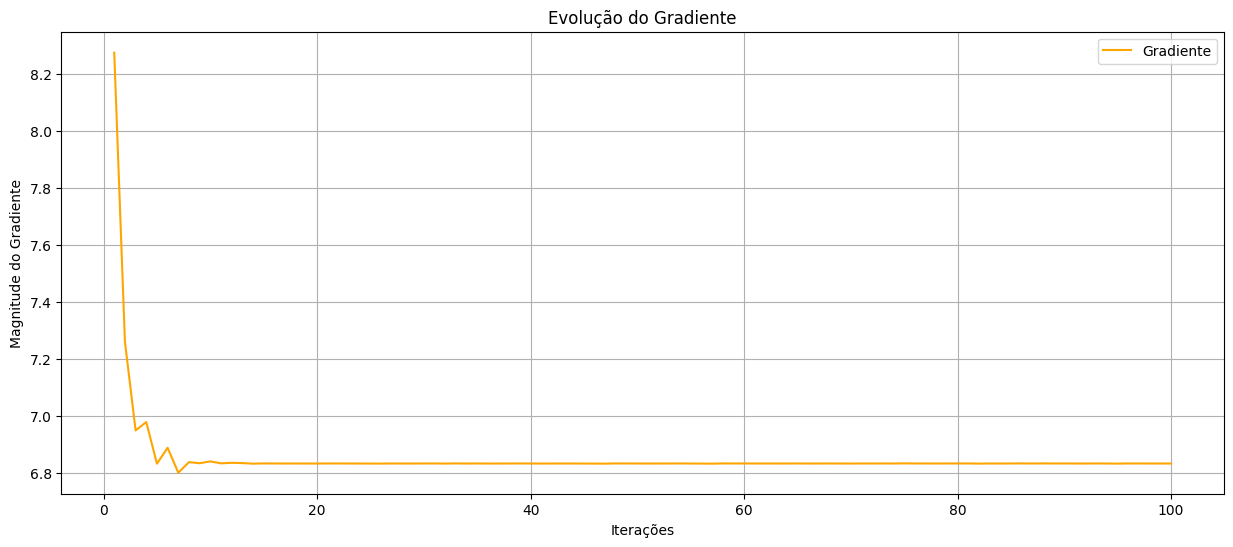

In [52]:
monitorar_custo_gradiente(model_lr, X_train, y_train, max_iter=100, nome_arquivo='Evolução da Função de Custo e do Gradiente')

Gráfico salvo


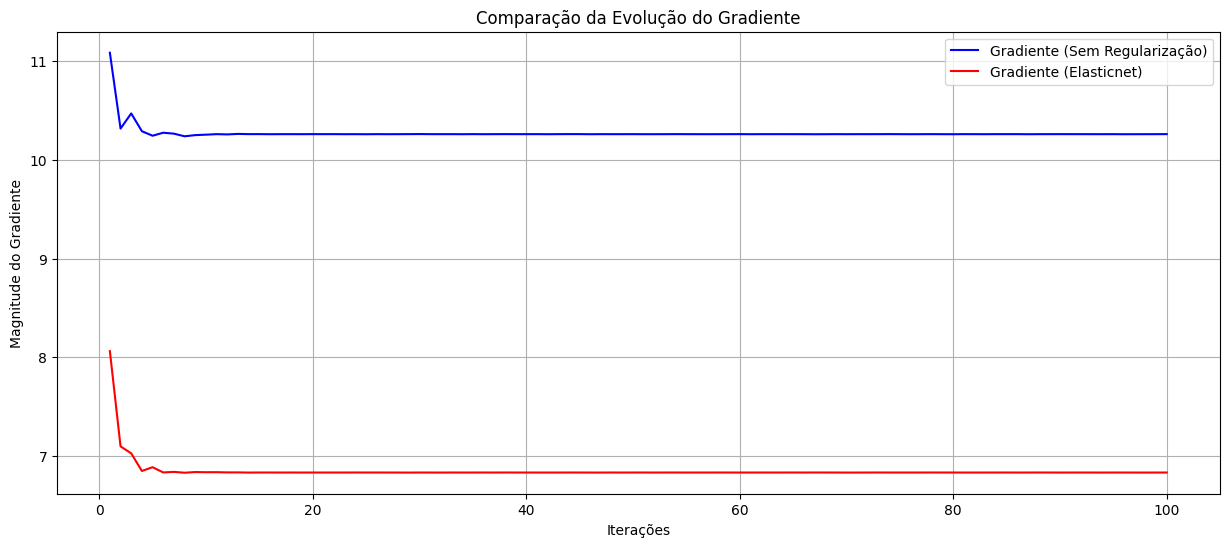

In [53]:
comparar_gradientes(X_train, y_train, model_lr, max_iter=100, nome_arquivo='Comparação da evolução do Gradiente sem e com Elasticnet')


##### Métricas com Threshold Ótimo (F1-Score) e Matriz confusão

##### Documentação:  
[scikit-learn - classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)  
[scikit-learn - confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[scikit-learn - ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

Visão de negócio

### ANÁLISE GRÁFICA DAS MÉTRICAS EM FUNÇÃO DE THRESHOLD ÓTIMO

### ANÁLISE GRÁFICA DA SENSIBILIDADE E ESTABILIDADE COM PONTO DE CORTE ÓTIMO

### ANÁLISE DE DESEMPENHO E DAS PROBABILIDADES DO MODELO
##### Documentação:
[scikit-learn - precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)  
[scikit-learn - roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)  
[scikit-learn - precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)  
[scikit-learn - auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

Curva ROC

Gráfico ROC salvo


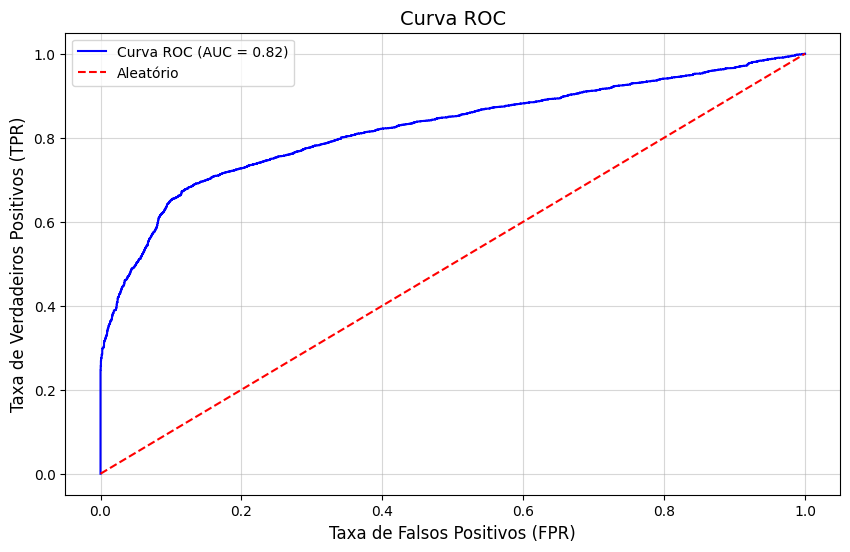

AUC: 0.8208


np.float64(0.8207584826976265)

In [54]:
plot_roc_curve(model_lr, X_test, y_test, nome_arquivo='Curva ROC modelo LogisticRegression')

Curva Precision-Recall - Curva Precisão-Sensibilidade

Gráfico Precision-Recall salvo


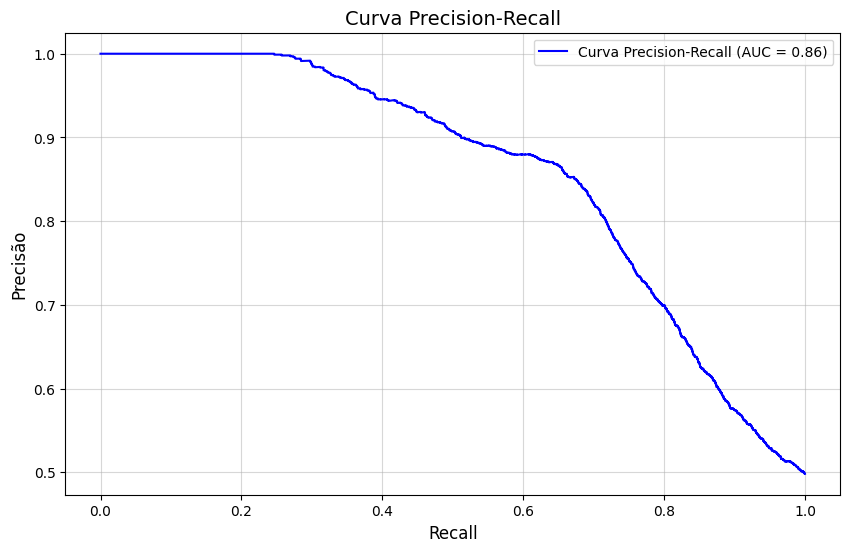

AUC-PR: 0.8568


np.float64(0.8567721896354837)

In [55]:
plot_precision_recall_curve(model_lr, X_test, y_test, nome_arquivo='Curva Precision-Recall modelo LogisticRegression')

Distribuição das probabilidades previstas

In [56]:
# Treinar o modelo com os dados de treino
model_lr.fit(X_train, y_train)

# Fazer previsões de probabilidade
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

Gráfico de distribuição de probabilidades salvo


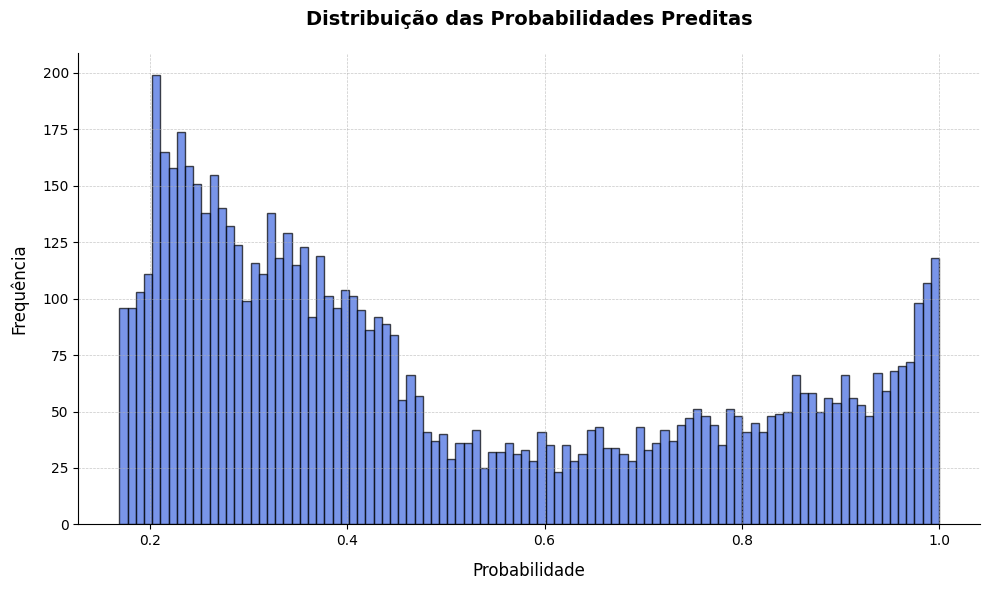

In [57]:
plot_probability_distribution(y_prob_th_lr, bins=100, nome_arquivo='Distribuição de Probabilidade modelo LogisticRegression')

AUC-PR - Area Under the Precision-Recall Curve - Área sob a curva Precisão-Sensibilidade

- AUC-PR foi utilizado para medir a capacidade do modelo d equilibrar precisão e Recall em diferentes pontos de corte, assumindo que inicialmente foi comprovado um desbalanceamento entre as classes

In [58]:
# Substitua y_true e y_prob pelos seus valores reais e preditos
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)
# Calcula AUC-PR
auc_pr = auc(recall, precision)
# Exibe os resultados
print(f'AUC-PR: {auc_pr:.2f}')

AUC-PR: 0.86


## Árvores - RandomForest

In [59]:
# Obter o caminho absoluto da pasta src/models/train_saved
project_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
src_path = os.path.join(project_path, 'src/models/train_saved')

optimal_threshold_rf = joblib.load(os.path.join(src_path, 'optimal_threshold_rf.pkl'))
model_rf = joblib.load(os.path.join(src_path, 'model_rf.pkl'))
# Carregar o modelo treinado

In [60]:
# Obter o caminho absoluto da pasta src/data/processed_data
project_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
src_path = os.path.join(project_path, 'src/data/processed_data')


y_pred_rf = joblib.load(os.path.join(src_path, 'y_pred_rf.pkl'))
y_pred_th_otimo_rf = joblib.load(os.path.join(src_path, 'y_pred_th_otimo_rf.pkl'))
y_prob_th_rf = joblib.load(os.path.join(src_path, 'y_prob_th_rf.pkl'))

print("Dados carregados com sucesso!")

Dados carregados com sucesso!


Estimativa de performance do modelo - OOB Score (Out-of-Bag Score)

In [61]:
print("OOB Score:", model_rf.oob_score_)

OOB Score: 0.7808835230221054


##### Matriz confusão

##### Documentação:
[scikit-learn - confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[scikit-learn - ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80      3626
           1       0.85      0.69      0.76      3601

    accuracy                           0.78      7227
   macro avg       0.79      0.78      0.78      7227
weighted avg       0.79      0.78      0.78      7227

Matriz de confusão salva


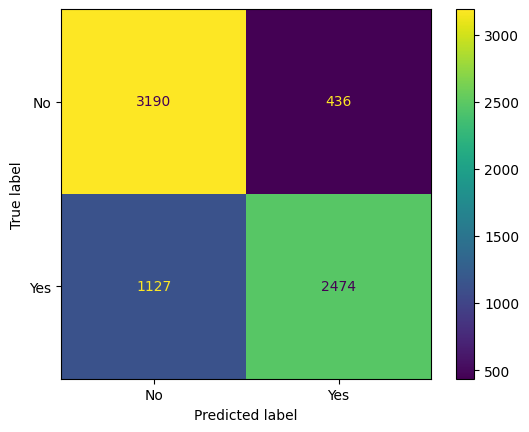

In [62]:
matriz_confusao(y_test, y_pred_rf, nome_arquivo='Matriz Confusão RandomForest - Threshold Padrão')

Visão de negócio

In [63]:
calcular_prejuizo(y_test, y_pred_rf, custo_fp=5, custo_fn=25)

Falsos Positivos (FP): 436 | Custo Unitário: R$ 5
Falsos Negativos (FN): 1127 | Custo Unitário: R$ 25
Prejuízo Total: R$ 30355.00


np.int64(30355)

##### Matriz confusão - Threshold Ótimo

##### Documentação:
[scikit-learn - confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[scikit-learn - ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.55      0.65      3626
           1       0.65      0.84      0.73      3601

    accuracy                           0.70      7227
   macro avg       0.71      0.70      0.69      7227
weighted avg       0.71      0.70      0.69      7227

Matriz de confusão salva


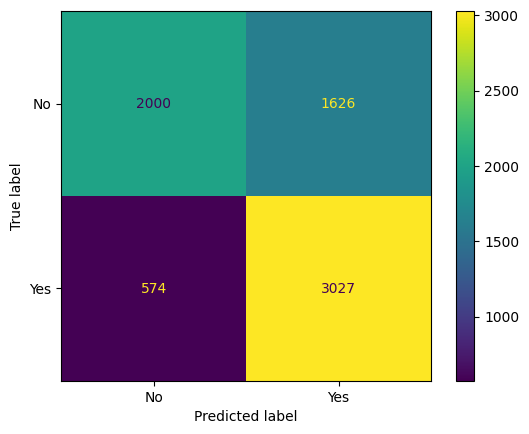

In [64]:
matriz_confusao(y_test, y_pred_th_otimo_rf, nome_arquivo='Matriz Confusão LogisticRegression - Threshold Ótimo Recall')

Visão de negócio - Threshold Ótimo

In [65]:
calcular_prejuizo(y_test, y_pred_th_otimo_rf, custo_fp=5, custo_fn=25)

Falsos Positivos (FP): 1626 | Custo Unitário: R$ 5
Falsos Negativos (FN): 574 | Custo Unitário: R$ 25
Prejuízo Total: R$ 22480.00


np.int64(22480)

### CURVA DE APRENDIZADO DO MODELO DE CLASSIFICAÇÃO POR ÁRVORES

##### Documentação:
[scikit-learn - learning_curve ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

Gráfico salvo em


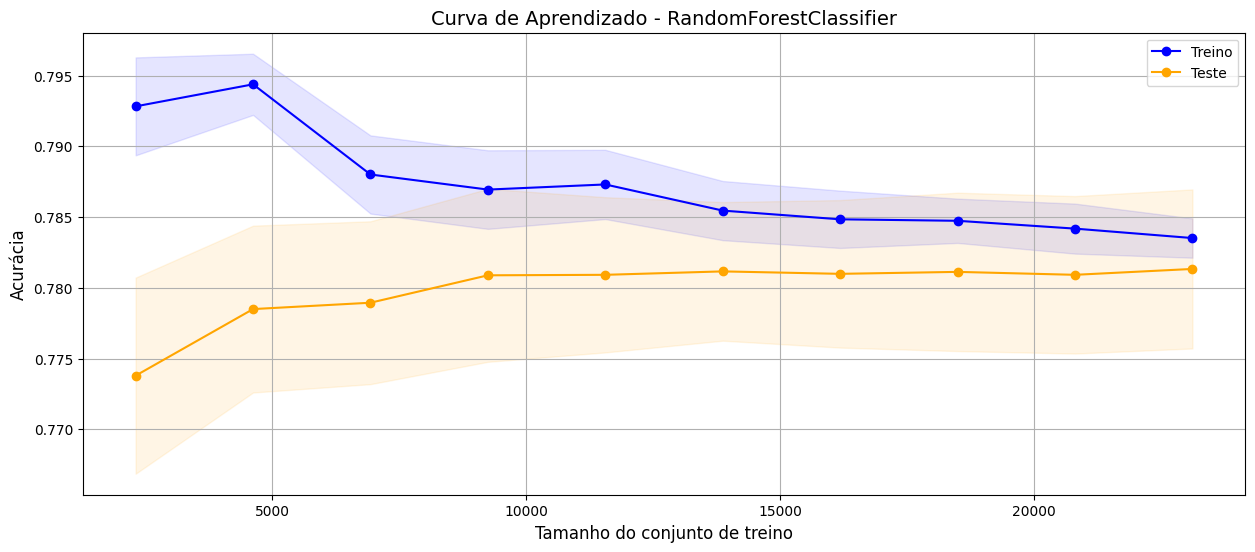

In [66]:
test_std, test_mean, test_scores = curva_de_aprendizado(model_rf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), nome_arquivo= 'Curva de Aprendizado modelo RandomForest')

Coeficiente de Variação

In [67]:
cv = (test_std / test_mean) * 100
print("Coeficiente de Variação (%):")
print(cv)

if all(cv < 10):
    print("O modelo está estável com CV abaixo de 10%.")
else:
    print("O modelo apresenta variação alta.")

Coeficiente de Variação (%):
[0.89538749 0.75722266 0.73871379 0.78286289 0.70225017 0.62685249
 0.66736957 0.71631753 0.71229409 0.71918046]
O modelo está estável com CV abaixo de 10%.


Variação relativa

In [68]:
calcular_variacao_relativa(test_scores, threshold=optimal_threshold_rf)

Variação relativa (desvio padrão / média) por tamanho de treino:
Tamanho 1: 0.0090
Tamanho 2: 0.0076
Tamanho 3: 0.0074
Tamanho 4: 0.0078
Tamanho 5: 0.0070
Tamanho 6: 0.0063
Tamanho 7: 0.0067
Tamanho 8: 0.0072
Tamanho 9: 0.0071
Tamanho 10: 0.0072

A variação está dentro dos limites aceitáveis (< 26.530612244897956%).


Função de custo - Log-loss

In [69]:

log_loss_geral, gradient_norm = log_loss_final(model_lr, X_train, y_train, X_test, y_test, optimal_threshold_rf)


Log Loss - Treino (Geral): 0.5013
Log Loss - Teste (Geral): 0.4981
Log Loss - Geral (Ponderada): 0.5007
Log Loss de Perda (classe 0) com threshold ótimo: 0.4670
Log Loss de Ganho (classe 1) com threshold ótimo: 0.5293
Norma do Gradiente: 6.8326


### ANÁLISE DE DESEMPENHO E DAS PROBABILIDADES DO MODELO
##### Documentação:
[scikit-learn - precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)  
[scikit-learn - roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)  
[scikit-learn - precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)  
[scikit-learn - auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

Curva ROC

Gráfico ROC salvo


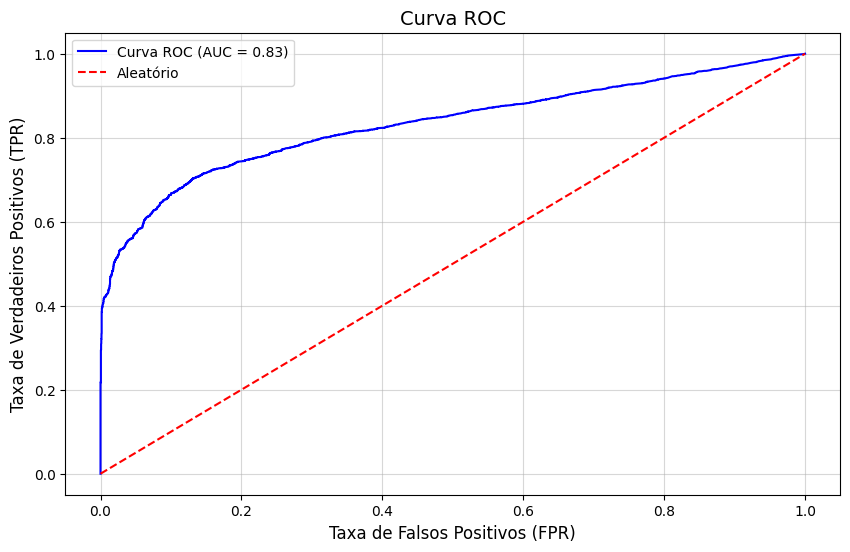

AUC: 0.8325


np.float64(0.8324619639730522)

In [70]:
plot_roc_curve(model_rf, X_test, y_test, nome_arquivo= 'Curva ROC modelo RandomForest')

Curva Precision-Recall - Curva Precisão-Sensibilidade

Gráfico Precision-Recall salvo


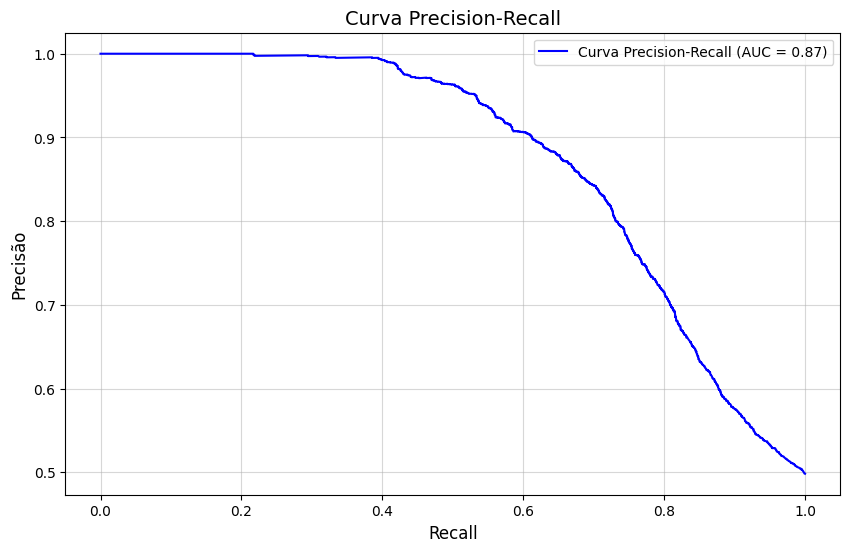

AUC-PR: 0.8730


np.float64(0.8730177509954551)

In [71]:
plot_precision_recall_curve(model_rf, X_test, y_test, nome_arquivo= 'Curva Precision-Recall modelo RandomForest')

Distribuição das probabilidades previstas

In [72]:
# Treinar o modelo com os dados de treino
model_rf.fit(X_train, y_train)

# Fazer previsões de probabilidade
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]

Gráfico de distribuição de probabilidades salvo


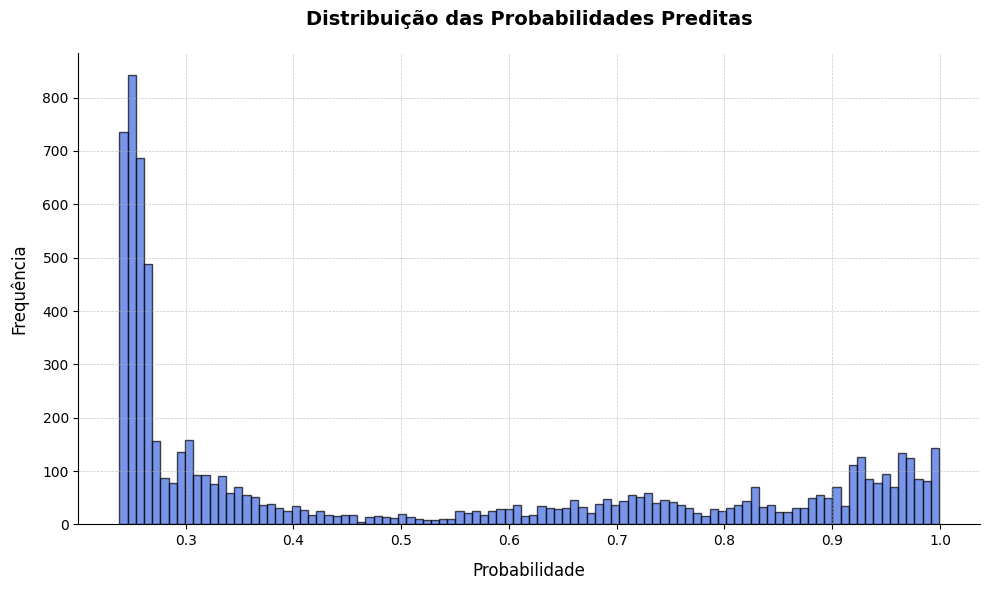

In [73]:
plot_probability_distribution(y_prob_th_rf, bins=100, nome_arquivo='Distribuição de Probabilidade modelo RandomForest')

AUC-PR - Area Under the Precision-Recall Curve - Área sob a curva Precisão-Sensibilidade

- AUC-PR foi utilizado para medir a capacidade do modelo d equilibrar precisão e Recall em diferentes pontos de corte, assumindo que inicialmente foi comprovado um desbalanceamento entre as classes

In [74]:
auc_pr = auc(recall, precision)
print(f'AUC-PR: {auc_pr:.2f}')


AUC-PR: 0.86
